In [1]:
import pandas as pd
df = pd.read_csv("fifa19_train.csv")

In [3]:
my_df=df[['quality','age','height', 'weight','position','intl_rep','pace', 'pace_acceleration', 'pace_sprint_speed',
       'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions',
       'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'defending', 'def_interceptions',
       'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle',
       'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength',
       'phys_aggression', 'gk_diving', 'gk_reflexes', 'gk_handling',
       'gk_speed', 'gk_kicking', 'gk_positoning','pref_foot', 'att_workrate',
       'def_workrate', 'weak_foot', 'skill_moves','cb', 'rb', 'lb', 'rwb',
       'lwb', 'cdm', 'cm', 'rm', 'lm', 'cam', 'cf', 'rf', 'lf', 'rw', 'lw',
       'st']]

###### Preprocess

In [5]:
my_df=my_df.fillna(0)

In [6]:
my_df['quality']=pd.factorize(my_df['quality'])[0]
my_df['position']=pd.factorize(my_df['position'])[0]
my_df['pref_foot']=pd.factorize(my_df['pref_foot'])[0]
my_df['def_workrate']=pd.factorize(my_df['def_workrate'])[0]
my_df['att_workrate']=pd.factorize(my_df['att_workrate'])[0]

In [7]:
my_df=my_df.astype(int)

In [8]:
y=df['overall']

###### Scaling the Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X = scaled.fit_transform(my_df)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

###### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression().fit(X_train,y_train)
y_pred=lin.predict(X_test)

###### ElasticNet

In [12]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet().fit(X_train,y_train)
y_pred1=enet.predict(X_test)

Lasso

In [13]:
from sklearn.linear_model import Lasso
las=Lasso().fit(X_train,y_train)
y_pred2=las.predict(X_test)

Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor().fit(X_train,y_train)
y_pred3=dtr.predict(X_test)

K Neighbors Regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor().fit(X_train,y_train)
y_pred4=knr.predict(X_test)

Gradient Boosting Regressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor().fit(X_train,y_train)
y_pred5=gbr.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Neural Network

In [17]:
import itertools

from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras import utils

from sklearn.preprocessing import add_dummy_feature
from keras.losses import mean_squared_error,mean_absolute_error
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
a,b=X_train.shape
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(b, input_dim=b, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=100, verbose=1)
results=estimator.fit(X_train,y_train)

y_pred6 = estimator.predict(X_test)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
12710/12710 [==============================] - 0s 26us/step - loss: 3754.4240
Epoch 2/200
12710/12710 [==============================] - 0s 10us/step - loss: 1328.0721
Epoch 3/200
12710/12710 [==============================] - 0s 12us/step - loss: 559.6099
Epoch 4/200
12710/12710 [==============================] - 0s 11us/step - loss: 249.9438
Epoch 5/200
12710/12710 [==============================] - 0s 11us/step - loss: 139.1738
Epoch 6/200
12710/12710 [==============================] - 0s 9us/step - loss: 89.8417
Epoch 7/200
12710/12710 [==============================] - 0s 9us/step - loss: 61.6647
Epoch 8/200
12710/12710 [==============================] - 0s 11us/step - loss: 44.5196
Epoch 9/200
12710/12710 [==============================] - 0s 12us/step - loss: 34.2575
Epoch 10/200
12710/12710 [==============================] - 0s 11us/step - loss: 27

12710/12710 [==============================] - 0s 10us/step - loss: 0.7335
Epoch 88/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.7141
Epoch 89/200
12710/12710 [==============================] - 0s 10us/step - loss: 0.7274
Epoch 90/200
12710/12710 [==============================] - 0s 15us/step - loss: 0.7174
Epoch 91/200
12710/12710 [==============================] - 0s 10us/step - loss: 0.7200
Epoch 92/200
12710/12710 [==============================] - 0s 12us/step - loss: 0.7035
Epoch 93/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.6876
Epoch 94/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.7011
Epoch 95/200
12710/12710 [==============================] - 0s 17us/step - loss: 0.7068
Epoch 96/200
12710/12710 [==============================] - 0s 17us/step - loss: 0.7028
Epoch 97/200
12710/12710 [==============================] - 0s 12us/step - loss: 0.6975
Epoch 98/200
12710/12710 [======================

12710/12710 [==============================] - 0s 10us/step - loss: 0.5825
Epoch 180/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5898
Epoch 181/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5915
Epoch 182/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.6008
Epoch 183/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5845
Epoch 184/200
12710/12710 [==============================] - 0s 10us/step - loss: 0.6130
Epoch 185/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5925
Epoch 186/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.6071
Epoch 187/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5883
Epoch 188/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5838
Epoch 189/200
12710/12710 [==============================] - 0s 9us/step - loss: 0.5827
Epoch 190/200
12710/12710 [=================

Evaluation R2 and Mean Squared Error

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
def evaluate(model,y_predict):
    print(model)
    r2=r2_score(y_test,y_predict)
    rms= mean_squared_error(y_test,y_predict)
    print("R2 score:",r2)
    print("RMSE score:",rms)
    return r2,rms

In [19]:
r2_lin,rmse_lin=evaluate("Linear Regression",y_pred)

Linear Regression
R2 score: 0.9269385318442543
RMSE score: 4.86283131723769


In [20]:
r2_lin,rmse_lin=evaluate("ElasticNet",y_pred1)

ElasticNet
R2 score: 0.8256815372036607
RMSE score: 11.60230284794939


In [21]:
r2_las,rmse_las=evaluate("Lasso",y_pred2)

Lasso
R2 score: 0.8344452346752863
RMSE score: 11.01900793757376


In [22]:
r2_dtr,rmse_dtr=evaluate("Decision Tree Regressor",y_pred3)

Decision Tree Regressor
R2 score: 0.9793905533362829
RMSE score: 1.3717252773188577


In [23]:
r2_knr,rmse_knr=evaluate("K Neighbors Regressor",y_pred4)

K Neighbors Regressor
R2 score: 0.9424570916127778
RMSE score: 3.8299457163087087


In [24]:
r2_gbr,rmse_gbr=evaluate("Gradient Boosting Regressor",y_pred5)

Gradient Boosting Regressor
R2 score: 0.9697140218714146
RMSE score: 2.015776669076951


In [25]:
r2_neu,rmse_neu=evaluate("Neural Network",y_pred6)

Neural Network
R2 score: 0.990821181129784
RMSE score: 0.6109245951941381


Plotting Prediction vs Test Values

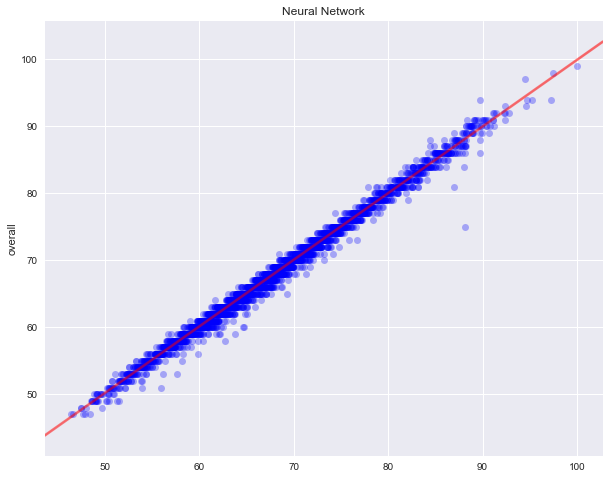

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.regplot(y_pred6,y_test,scatter_kws={'alpha':0.3, 'color':'blue'},line_kws={'color':'red','alpha':0.5})
plt.title("Neural Network")
plt.show()